In [1]:
import pandas as pd

In [2]:
# Load the Titanic dataset CSV file
df = pd.read_csv('titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Check the shape and columns

# Shape tells you how many rows and columns you have
print("Number of rows and columns:", df.shape)

# List all columns in the dataset
print("Column names:", df.columns.tolist())

Number of rows and columns: (891, 12)
Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
#See info about each column

# Get info about types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Get quick statistics

# See stats like mean, min, max, etc.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Clean the Data and Handle Missing Values

#Check for Missing Values

# Check how many missing values are in each column
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
#Handle Missing Data

# Fill missing 'Age' values with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' values with the most common (mode) value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop the 'Cabin' column because it has too many missing values
df = df.drop('Cabin', axis=1)

In [10]:
#Double-Check Missing Values

print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [11]:
#Convert the “Sex” Column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [12]:
#Convert the “Embarked” Column

import pandas as pd

# Create dummy variables for 'Embarked'
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Add the new dummy columns to your DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# Drop the original 'Embarked' column
df = df.drop('Embarked', axis=1)

In [13]:
#Remove Unhelpful Text Columns

df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [14]:
#Split Your Data and Train the Model
#Separate Features (X) and Target (y)
#Features (X): All columns except "Survived" (these are used to make predictions).
#Target (y): The "Survived" column (what you want to predict).

X = df.drop('Survived', axis=1)
y = df['Survived']

In [15]:
#Split Into Training and Test Sets
#Use 80% of data to train, 20% to test (this helps check your model’s accuracy).

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Train Your Logistic Regression Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
#Evaluate Model Performance

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [18]:
#Interpret Feature Importance and Understand Your Model
#Check Which Features Matter Most
#For logistic regression, the model coefficients tell you how each feature affects the prediction:


import numpy as np

feature_names = X.columns
coefficients = model.coef_[0]

# Sort features by the absolute value of their coefficients
feature_importance = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

print("Feature importance (by absolute coefficient):")
for feature, coef in feature_importance:
    print(f"{feature}: {coef:.4f}")

Feature importance (by absolute coefficient):
Sex: 2.5927
Pclass: -0.9377
SibSp: -0.2948
Embarked_S: -0.2244
Embarked_C: 0.1963
Parch: -0.1087
Embarked_Q: 0.0524
Age: -0.0306
Fare: 0.0025


In [20]:
import matplotlib.pyplot as plt

In [21]:
!pip install seaborn

In [22]:
import seaborn as sns

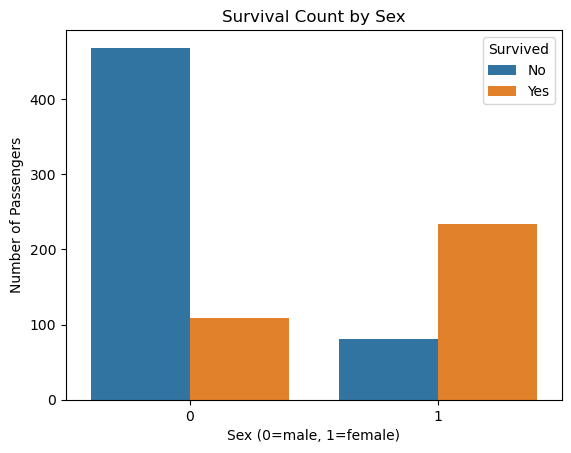

In [23]:
#Visualize Survival by Sex
#This will help you see how survival differed between male and female passengers.

# Make sure 'Sex' is encoded (0=male, 1=female) as in your previous steps
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex (0=male, 1=female)')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

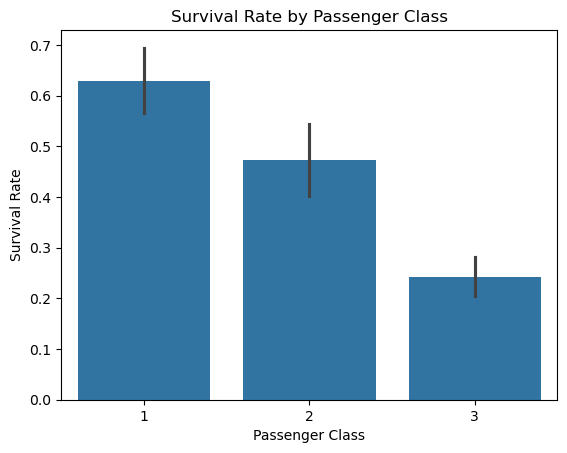

In [24]:
#Visualize Survival Rate by Passenger Class
#See how class affected chances of survival.
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

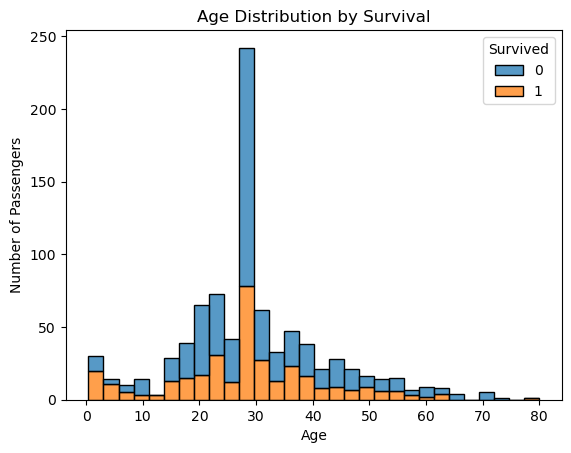

In [25]:
#Visualize Age Distribution by Survival
#Check whether age made a difference in survival.

sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

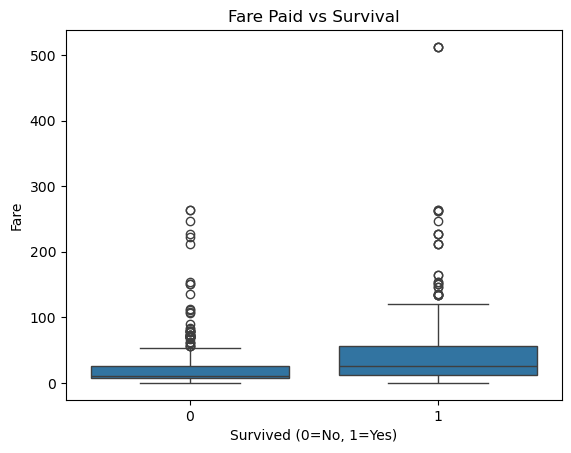

In [27]:
###Visualize Fare Distribution by Survival
#See if wealth (ticket fare) influenced survival.


sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Paid vs Survival')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Fare')
plt.show()